In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
warnings.simplefilter(action='ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# 

(8693, 14)
(4277, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


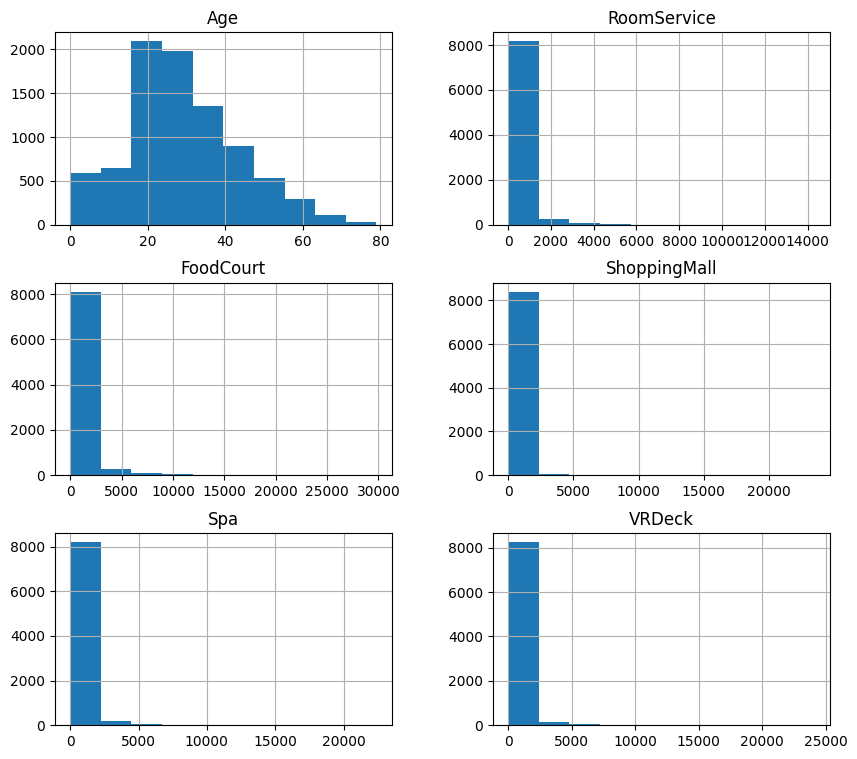

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Cab_1           0
Cab_3           0
Cab_2           0
dtype: int64

In [2]:
train_data= pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")

print(train_data.shape)
test_data= pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
print(test_data.shape)

train_data.info() ##데이터 자료형 확인

train_data.isna().sum() #데이터 결측치 확인

train_data.describe() #수치형 데이터 확인

train_data.describe(include=['O']) #범주형 데이터 확인


train_data.hist(figsize=(10, 9))
plt.show()

#서비스들의 max 값은 크지만 평균이 낮은 것과 25%, 50% 값이 0인것으로 보아 대부분의 승객들은 서비스를 이용하지 않지만, 서비스를 이용하는 소수의 사람들은 금액을 많이 사용한 것으로 유추

# 결측치 처리
# 결측치 처리
train_data['CryoSleep'] = train_data['CryoSleep'].fillna(0)
train_data['VIP'] = train_data['VIP'].fillna(0)
train_data['Cabin'] = train_data['Cabin'].fillna(train_data['Cabin'].mode()[0])
train_data['HomePlanet'] = train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0])
train_data['Destination'] = train_data['Destination'].fillna(train_data['Destination'].mode()[0])
train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(train_data['ShoppingMall'].median())
train_data['VRDeck'] = train_data['VRDeck'].fillna(train_data['VRDeck'].median())
train_data['FoodCourt'] = train_data['FoodCourt'].fillna(train_data['FoodCourt'].median())
train_data['Spa'] = train_data['Spa'].fillna(train_data['Spa'].median())
train_data['RoomService'] = train_data['RoomService'].fillna(train_data['RoomService'].median())
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

#CryoSleep, VIP, Cabin, HomePlanet, Destination과 같이 bool형 또는 object는 최빈값으로 전처리

# 수치형 데이터는 중앙값으로 전처리하였습니다.
# 평균값 말고 중앙값으로 전처리를 한 이유는 예외값에 영향을 거의 받지 않기 때문

# Cabin 분할
cab = train_data["Cabin"].apply(lambda x: x.split("/"))

train_data["Cab_1"] = cab.apply(lambda x: x[0])
train_data["Cab_3"] = cab.apply(lambda x: x[2])
train_data["Cab_2"] = cab.apply(lambda x: float(x[1]))

#필요 없는 column drop
train_data.drop(['PassengerId', 'Name', 'Cabin'], axis = 1, inplace = True)

# bool형 int로 변경
train_data["VIP"] = train_data["VIP"].astype(int)
train_data["CryoSleep"] = train_data["CryoSleep"].astype(int)

train_data.isna().sum() #데이터 결측치 확인

- 결측치 0으로 변환

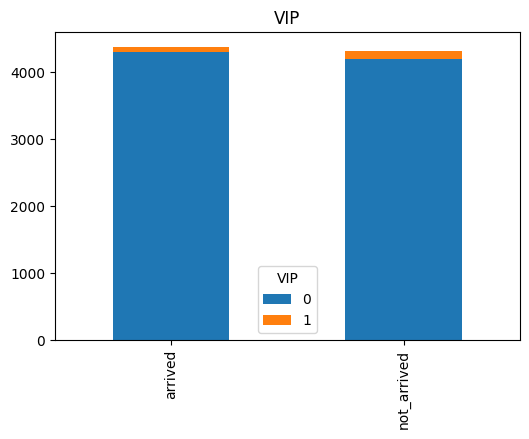

In [3]:
train_data[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported')

arrived = train_data[train_data['Transported'] == 1]['VIP']. value_counts()
not_arrived = train_data[train_data['Transported'] == 0]['VIP']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= True , figsize= (6,4))
plt.title('VIP')
plt. show()

- vip를 신청한 사람 중 제대로 도착을 한 인원의 비중이 약 38퍼센트, 신청하지 않은 사람 중 도착한 인원의 비중이 약 50퍼센트인 것을 확인
- 그래프로 나타내었을 때 약 1.3배의 차이가 있지만 신청을 하지 않은 사람의 비중이 압도적으로 크므로 크게 영향이 있다고 보기는 제한

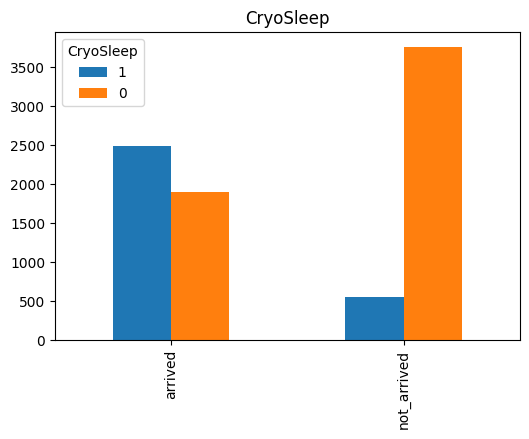

In [4]:
train_data[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported')

arrived = train_data[train_data['Transported'] == 1]['CryoSleep']. value_counts()
not_arrived = train_data[train_data['Transported'] == 0]['CryoSleep']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= False, figsize= (6,4))
plt.title('CryoSleep')
plt. show()

- Cryosleep을 신청한 사람 중 80퍼센트가 도착한 것으로 보아 어느정도 관계가 있다고 볼 수 있음
- 신청하지 않은 사람이 많지만 신청을 한 사람중 대부분이 도착한 것으로 확인

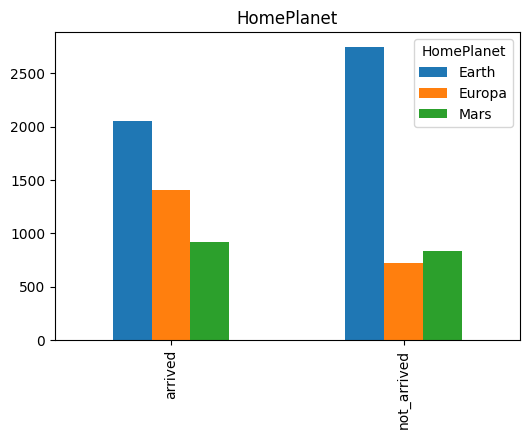

In [5]:
train_data[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported')

arrived = train_data[train_data['Transported'] == 1]['HomePlanet']. value_counts()
not_arrived = train_data[train_data['Transported'] == 0]['HomePlanet']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df.index = ['arrived','not_arrived']
df.plot(kind= 'bar',stacked= False , figsize= (6,4))
plt.title('HomePlanet')
plt. show()

- 출발행성은 지구가 가장 많은 것으로 확인
- 하지만, 화성과 유로파에서 출발한 인원은 절반 이상이 도착에 성공한 것으로 확인

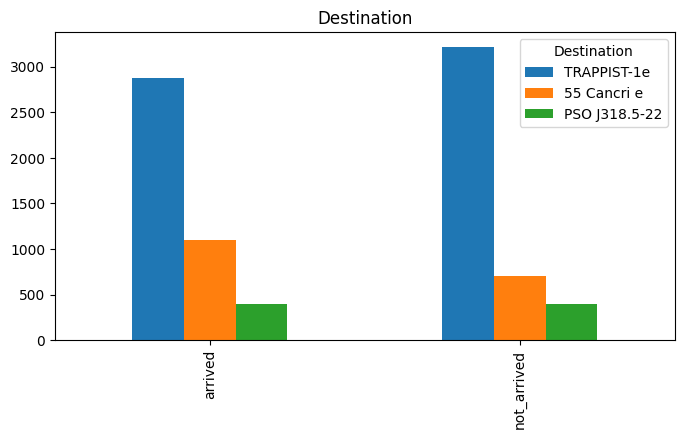

In [6]:
train_data[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported')

arrived = train_data[train_data['Transported'] == 1]['Destination']. value_counts()
not_arrived = train_data[train_data['Transported'] == 0]['Destination']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= False , figsize= (8,4))
plt.title('Destination')
plt. show()

- 도착지는 대부분 약 50퍼센트에 가깝지만, 55 Cancri e가 도착지인 경우 다른 도착지보다 10퍼센트 더 높은 것을 확인

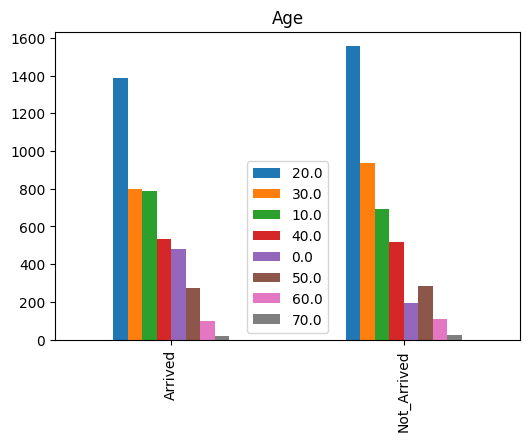

In [7]:
train_data.loc[(train_data['Age'] >= 0) & (train_data['Age'] < 10), 'Age'] = 0
train_data.loc[(train_data['Age'] >= 10) & (train_data['Age'] < 20), 'Age'] = 10
train_data.loc[(train_data['Age'] >= 20) & (train_data['Age'] < 30), 'Age'] = 20
train_data.loc[(train_data['Age'] >= 30) & (train_data['Age'] < 40), 'Age'] = 30
train_data.loc[(train_data['Age'] >= 40) & (train_data['Age'] < 50), 'Age'] = 40
train_data.loc[(train_data['Age'] >= 50) & (train_data['Age'] < 60), 'Age'] = 50
train_data.loc[(train_data['Age'] >= 60) & (train_data['Age'] < 70), 'Age'] = 60
train_data.loc[(train_data['Age'] >= 70) & (train_data['Age'] < 80), 'Age'] = 70

Arrived = train_data[train_data['Transported'] == 1]['Age']. value_counts()
Not_Arrived = train_data[train_data['Transported'] == 0]['Age']. value_counts()
df = pd. DataFrame([Arrived, Not_Arrived])
df. index = ['Arrived','Not_Arrived']
df. plot(kind= 'bar',stacked= False , figsize= (6,4)). legend(loc = 'lower center')
plt.title('Age')
plt. show()

- 연령대는 0세부터 79세까지 분포하기 때문에 10대, 20대와 같이 범위를 나누었습니다.
- 0~19세까지는 도착률이 더 높고, 20~39세는 도착률이 더 낮으며 40세 이후로는 도착률이 거의 동일한 것을 확인할 수 있습니다

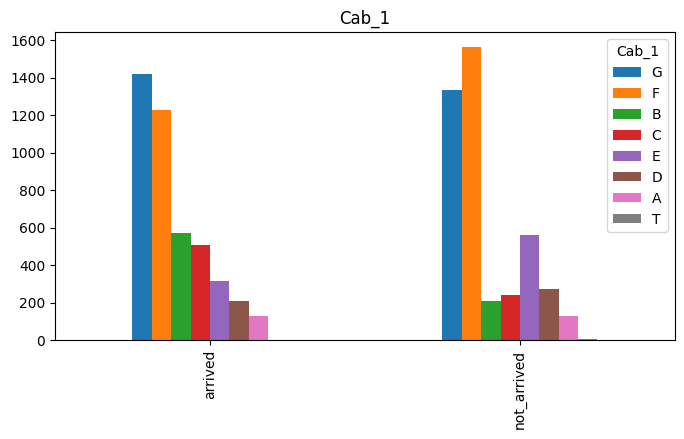

In [8]:
arrived = train_data[train_data['Transported'] == 1]['Cab_1']. value_counts()
not_arrived = train_data[train_data['Transported'] == 0]['Cab_1']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= False , figsize= (8,4))
plt.title('Cab_1')
plt. show()


특별하게 B, C 호실이 도착률이 두배가 높은 것을 볼 수 있습니다.
반대로 E 호실은 도착률이 두배가 낮은 것도 확인할 수 있습니다.

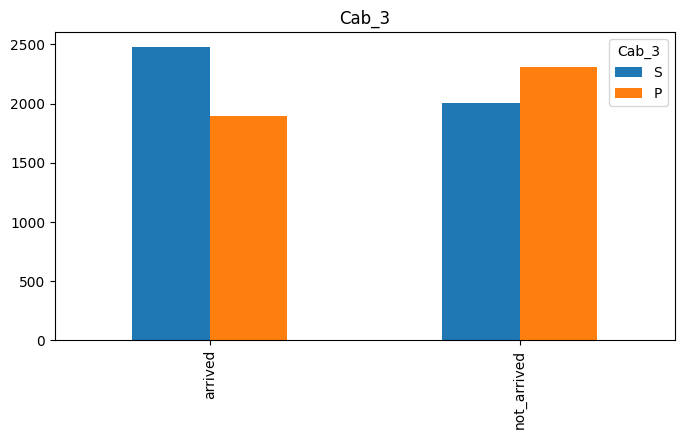

In [9]:
arrived = train_data[train_data['Transported'] == 1]['Cab_3']. value_counts()
not_arrived = train_data[train_data['Transported'] == 0]['Cab_3']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= False , figsize= (8,4))
plt.title('Cab_3')
plt. show()


- spaceship의 우현에 앉은 사람이 도착률이 조금 더 높은 것을 알 수 있습니다.


In [10]:
# plt.figure(figsize = (16, 12))
# x = sns.heatmap(train_data.corr(), cmap = 'Blues', linewidths = '0.1',annot = True)

In [11]:
input_data = train_data.drop(['Transported'], axis = 1)
encoding_train_data = pd.get_dummies(input_data)
encoding_train_data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cab_2,HomePlanet_Earth,...,Cab_1_A,Cab_1_B,Cab_1_C,Cab_1_D,Cab_1_E,Cab_1_F,Cab_1_G,Cab_1_T,Cab_3_P,Cab_3_S
0,0,30.0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,...,False,True,False,False,False,False,False,False,True,False
1,0,20.0,0,109.0,9.0,25.0,549.0,44.0,0.0,True,...,False,False,False,False,False,True,False,False,False,True
2,0,50.0,1,43.0,3576.0,0.0,6715.0,49.0,0.0,False,...,True,False,False,False,False,False,False,False,False,True
3,0,30.0,0,0.0,1283.0,371.0,3329.0,193.0,0.0,False,...,True,False,False,False,False,False,False,False,False,True
4,0,10.0,0,303.0,70.0,151.0,565.0,2.0,1.0,True,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,40.0,1,0.0,6819.0,0.0,1643.0,74.0,98.0,False,...,True,False,False,False,False,False,False,False,True,False
8689,1,10.0,0,0.0,0.0,0.0,0.0,0.0,1499.0,True,...,False,False,False,False,False,False,True,False,False,True
8690,0,20.0,0,0.0,0.0,1872.0,1.0,0.0,1500.0,True,...,False,False,False,False,False,False,True,False,False,True
8691,0,30.0,0,0.0,1049.0,0.0,353.0,3235.0,608.0,False,...,False,False,False,False,True,False,False,False,False,True


In [12]:
encoding_train_data.columns


Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Cab_2', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cab_1_A',
       'Cab_1_B', 'Cab_1_C', 'Cab_1_D', 'Cab_1_E', 'Cab_1_F', 'Cab_1_G',
       'Cab_1_T', 'Cab_3_P', 'Cab_3_S'],
      dtype='object')

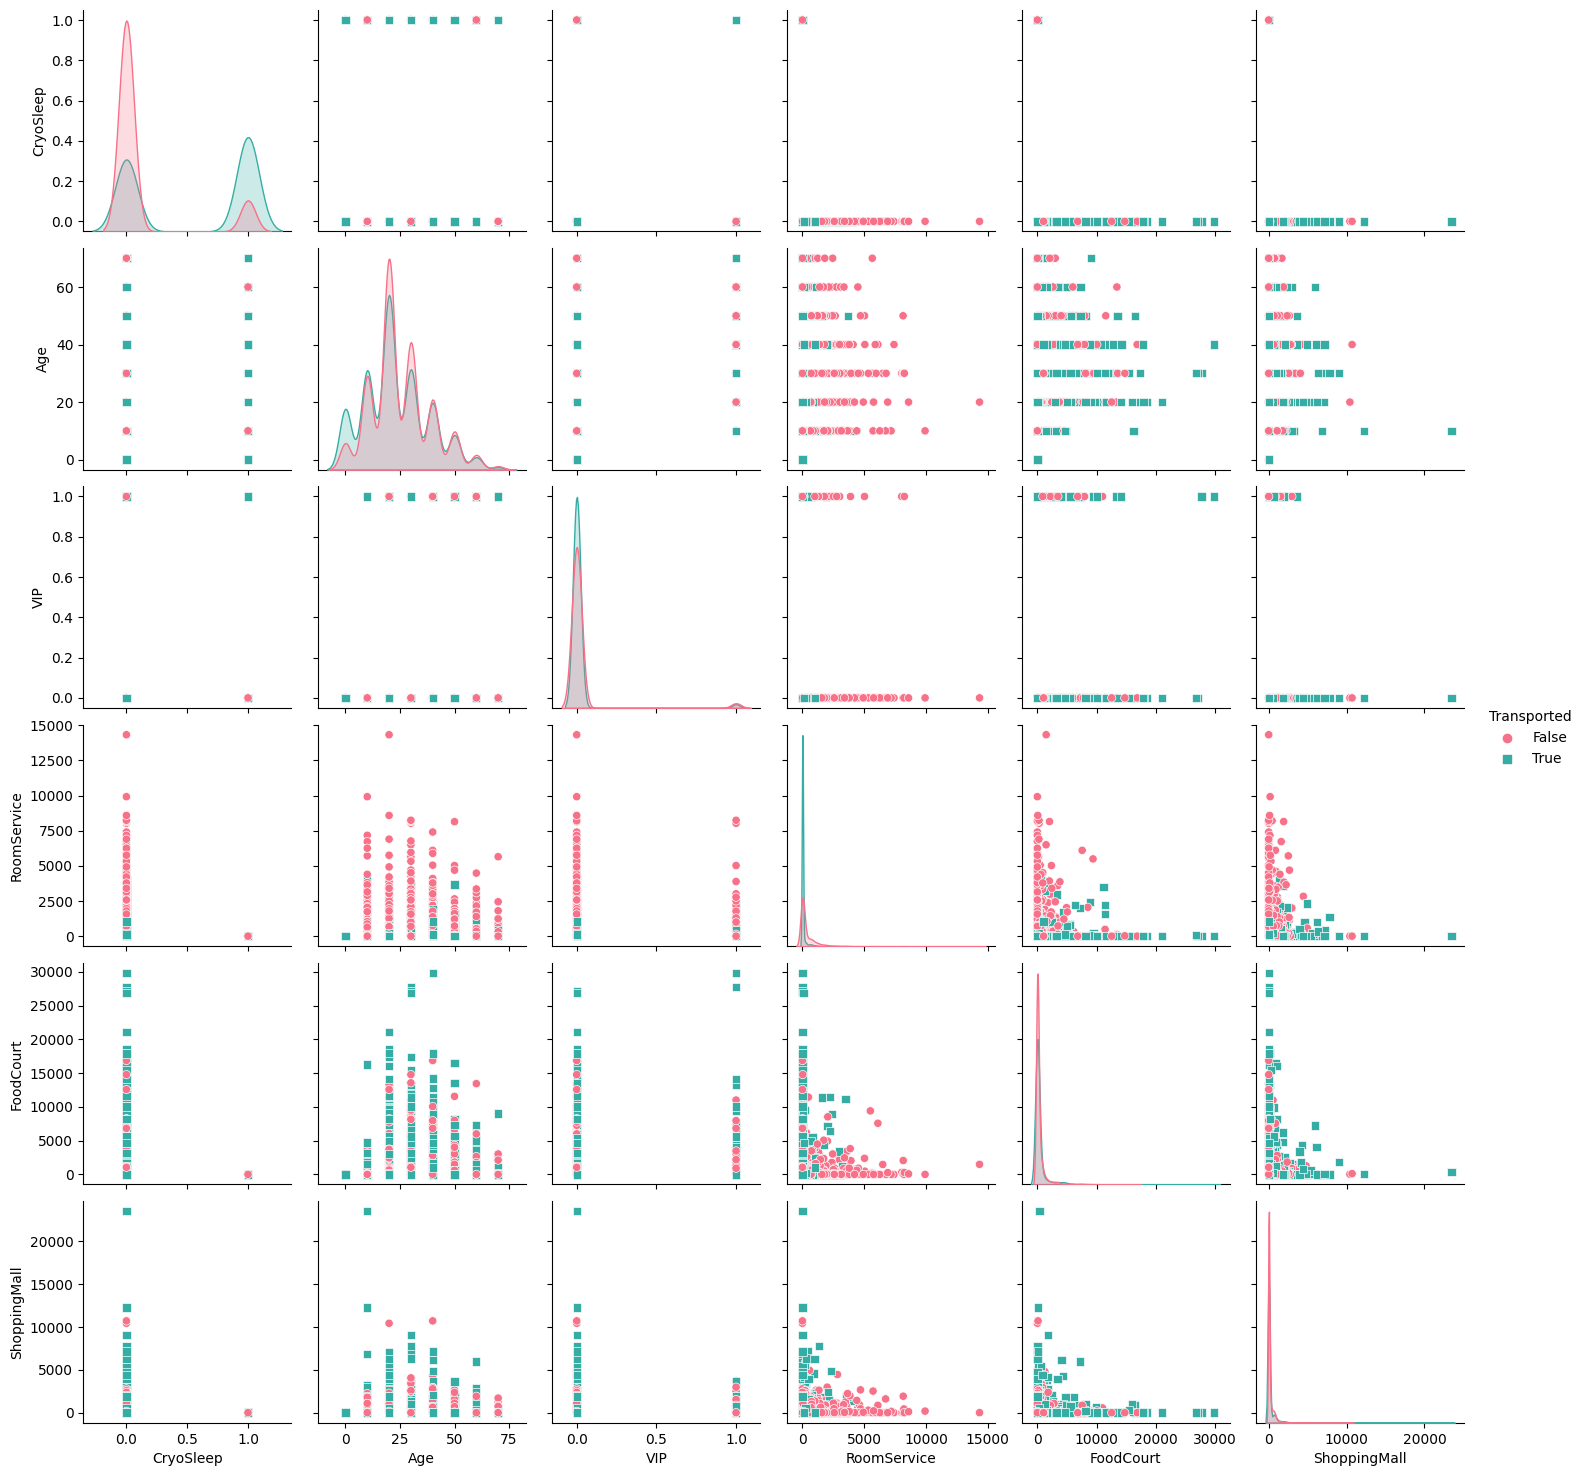

In [13]:
analysis = pd.merge(encoding_train_data, train_data['Transported'], left_index = True, right_index=True)
sns.pairplot(analysis[['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Transported']],hue='Transported', palette='husl', markers=['o','s'])
plt.show()

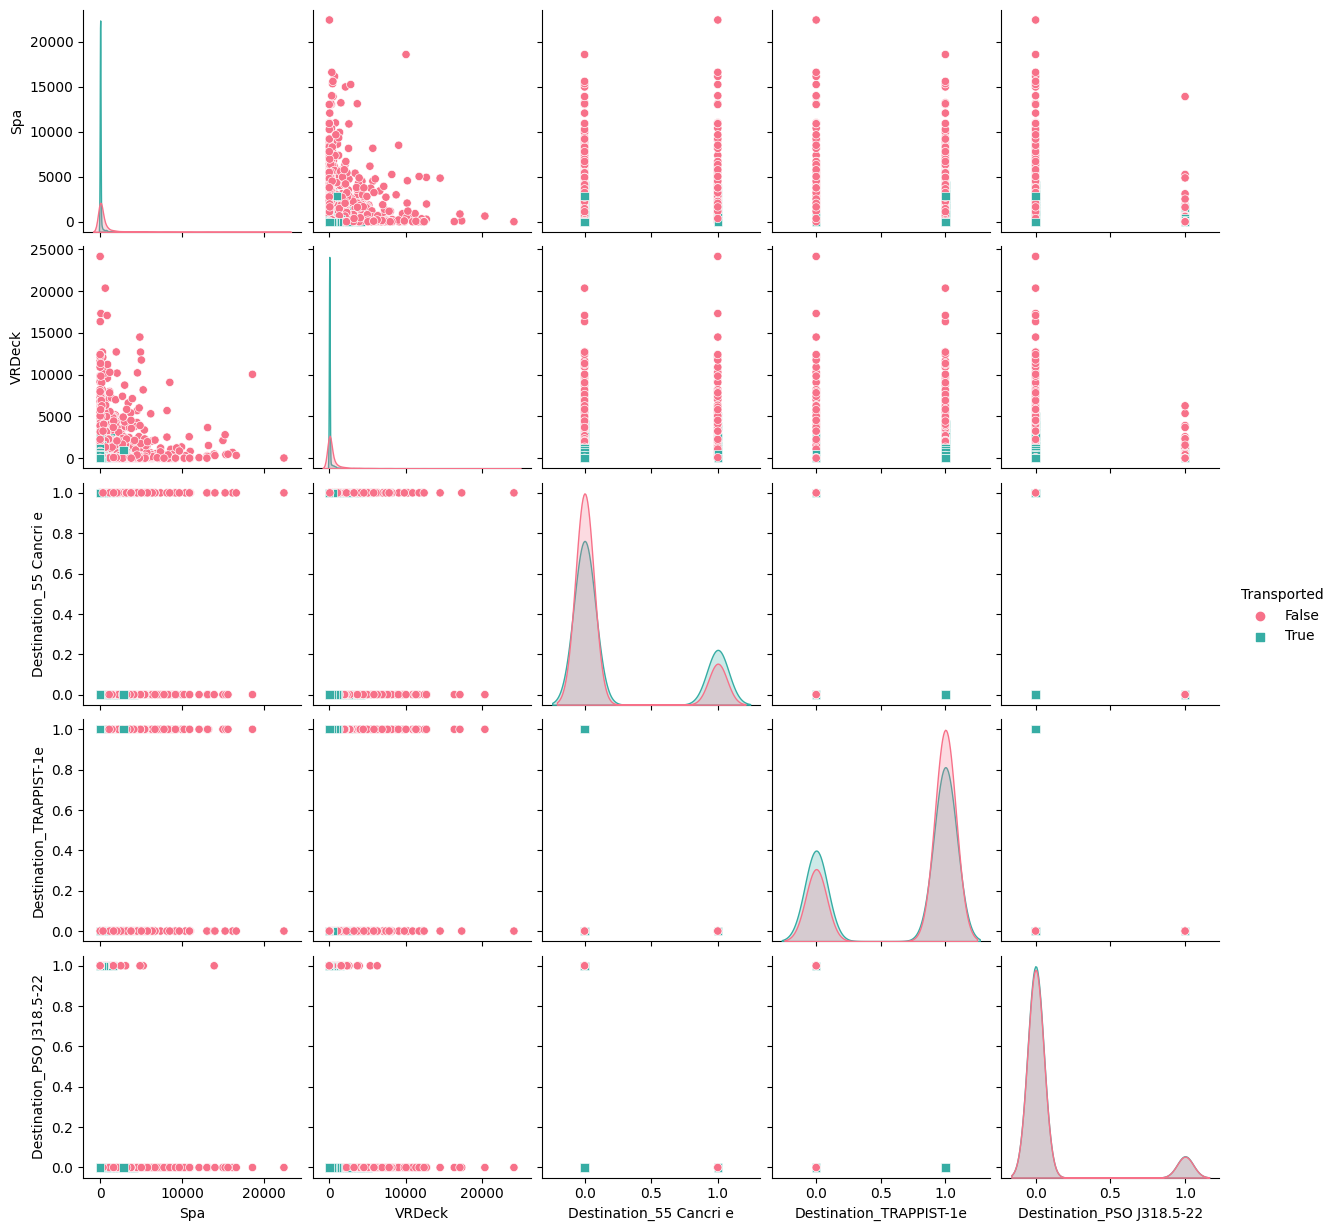

In [14]:
sns.pairplot(analysis[['Spa', 'VRDeck', 'Destination_55 Cancri e', 'Destination_TRAPPIST-1e', 'Destination_PSO J318.5-22', 'Transported']],hue='Transported', palette='husl', markers=['o','s'])
plt.show()

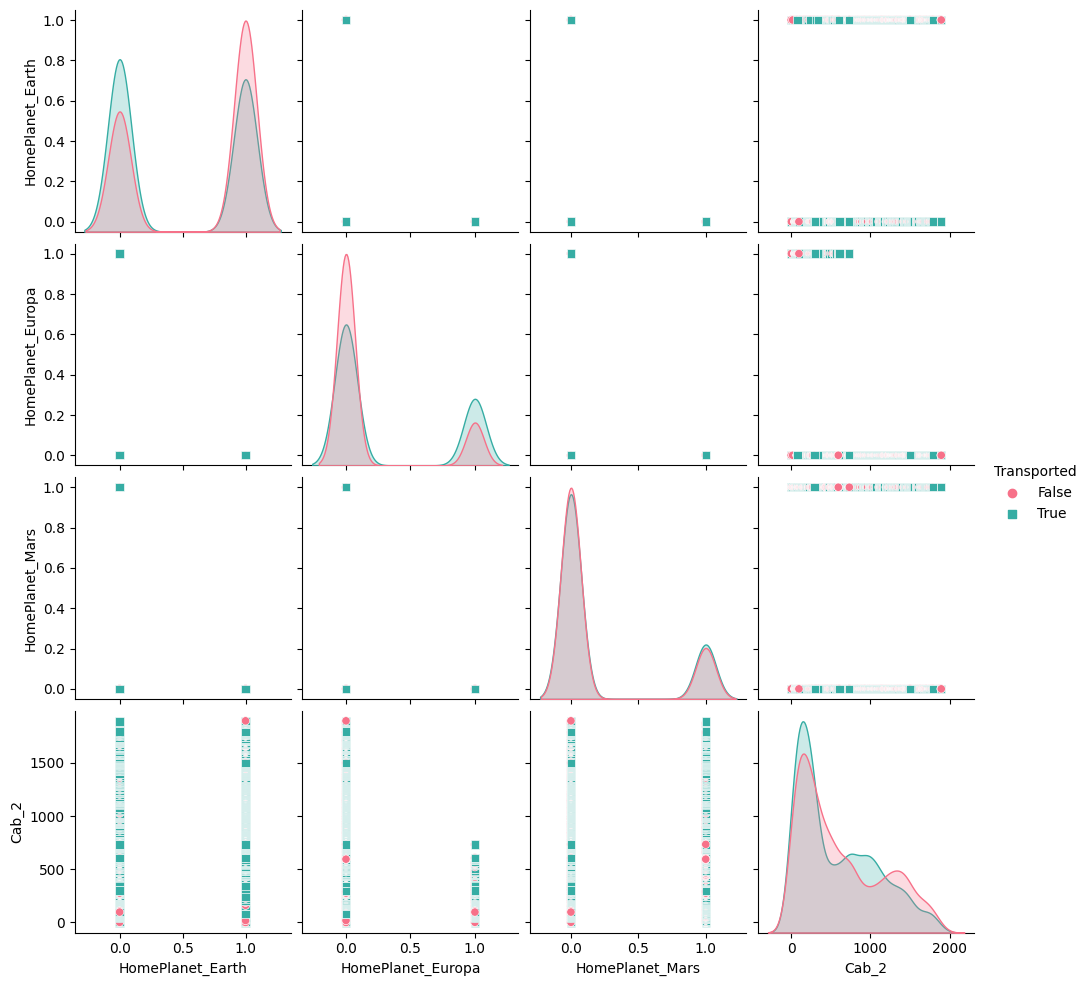

In [15]:
sns.pairplot(analysis[['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Cab_2', 'Transported']],hue='Transported', palette='husl', markers=['o','s'])
plt.show()

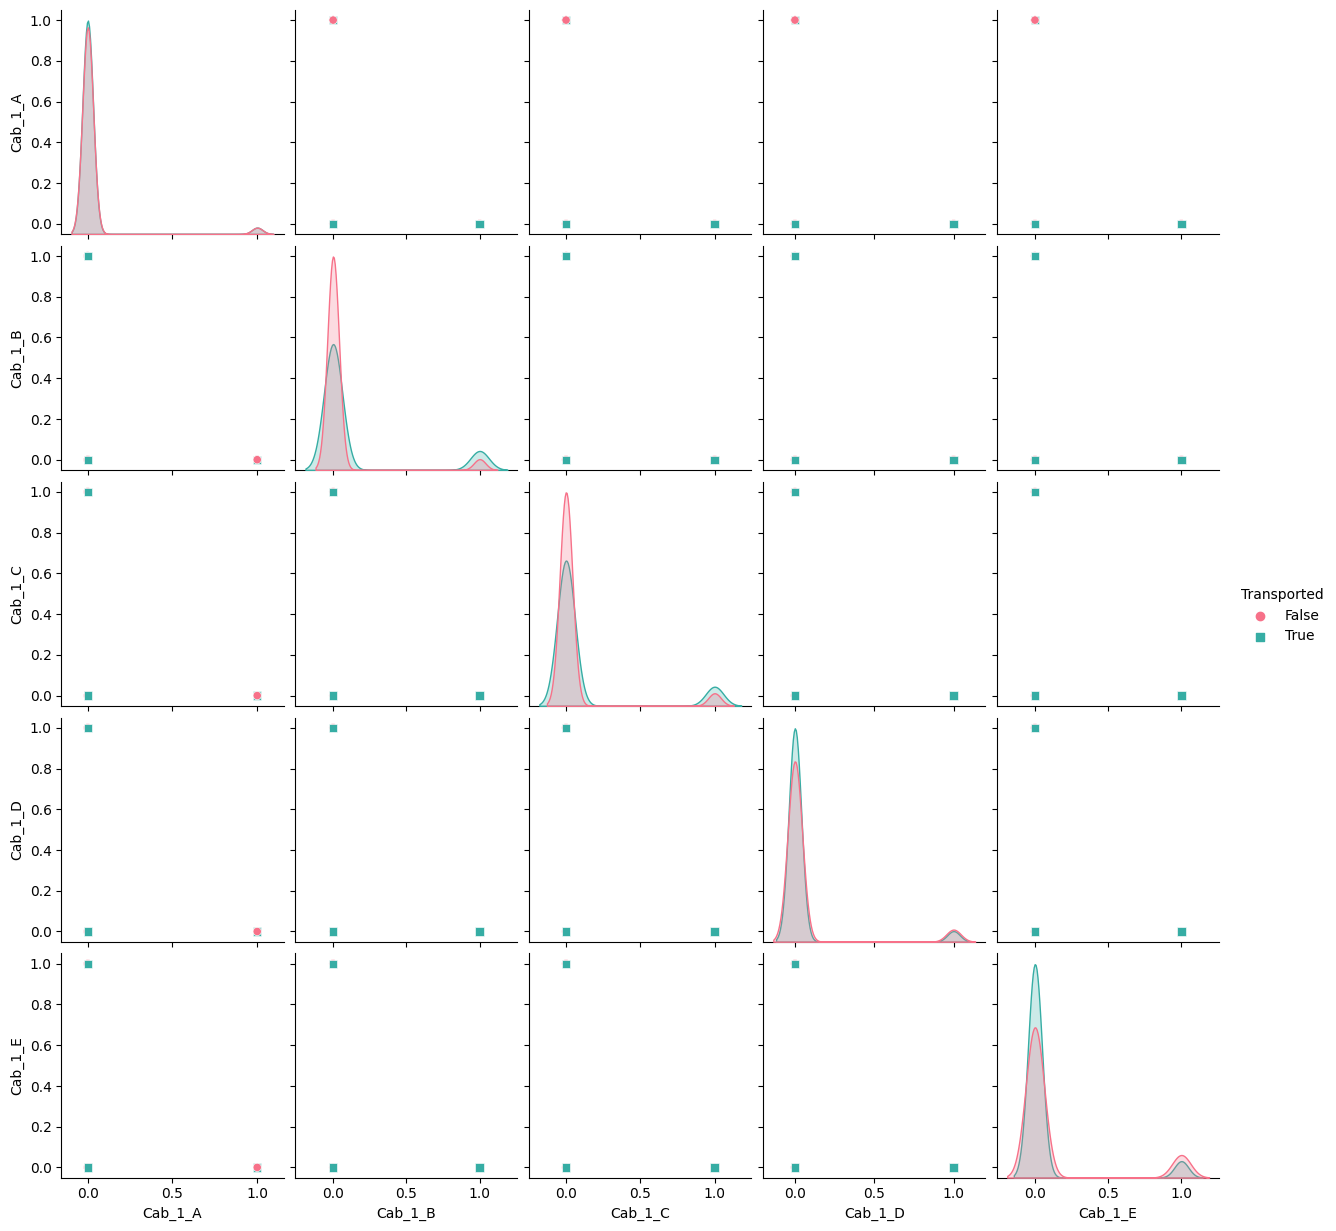

In [16]:
sns.pairplot(analysis[['Cab_1_A','Cab_1_B', 'Cab_1_C', 'Cab_1_D', 'Cab_1_E', 'Transported']],hue='Transported', palette='husl', markers=['o','s'])
plt.show()

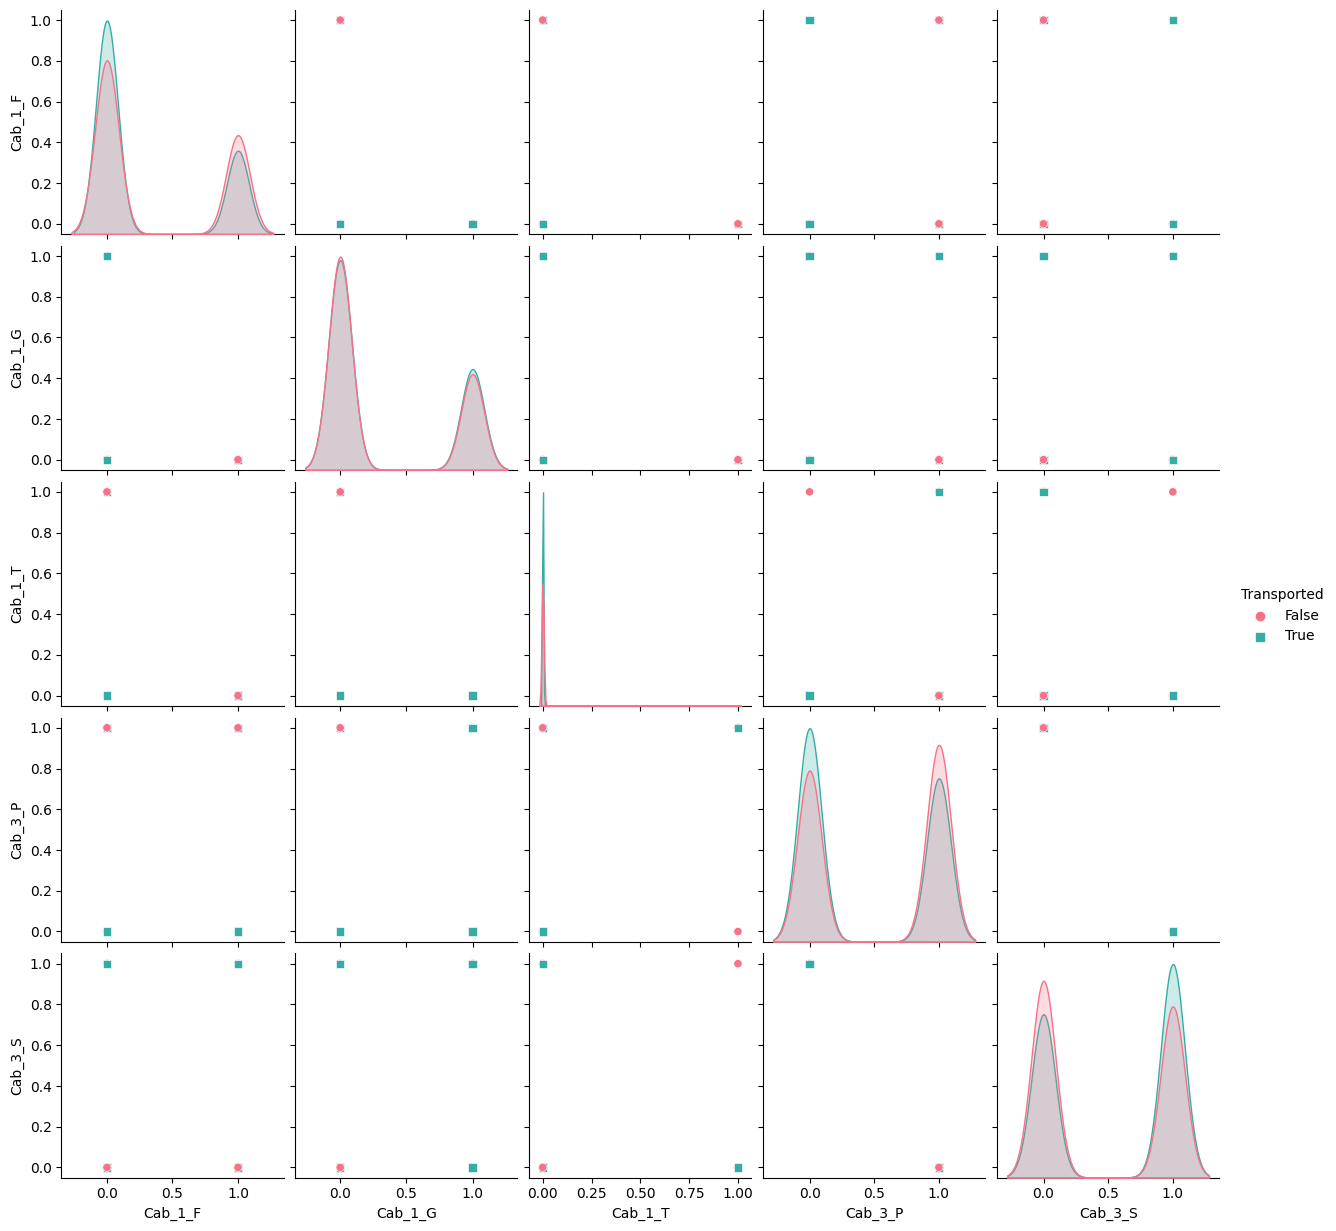

In [17]:
sns.pairplot(analysis[['Cab_1_F', 'Cab_1_G', 'Cab_1_T', 'Cab_3_P', 'Cab_3_S', 'Transported']],hue='Transported', palette='husl', markers=['o','s'])
plt.show()

In [18]:

from sklearn.decomposition import PCA
y_target = train_data['Transported']
x_data = encoding_train_data.drop(['Cab_1_A', 'Cab_1_G', 'Cab_1_T', 'Cab_1_D', 'Cab_1_C', 'VIP', 'HomePlanet_Mars', 'Destination_PSO J318.5-22'], axis = 1)

pca = PCA(n_components = 10)
pca.fit(encoding_train_data)
pca_train_data = pca.transform(encoding_train_data)
pca_train_data

pca_cols = []
for i in range(0, 10) :
    x = 'pca_col' + str(i)
    pca_cols.append(x)
pca_cols
pca_df = pd.DataFrame(pca_train_data, columns = pca_cols)
pca_df

,pca_col0,pca_col1,pca_col2,pca_col3,pca_col4,pca_col5,pca_col6,pca_col7,pca_col8,pca_col9
0,-535.347993,-188.719052,-27.403608,-245.550408,-117.238721,-653.537368,5.383541,-0.796983,-0.366197,-0.017770
1,-364.458665,174.659109,351.457671,-144.055849,-124.735158,-625.823860,-5.381881,0.531755,-0.156148,-0.968397
2,4601.925063,2538.927684,4854.954129,-308.602210,-180.207667,-199.064570,16.125072,0.579121,-0.099649,-0.549653
3,1609.039046,1476.551939,2291.397329,-211.094721,214.340015,-444.477834,0.793883,0.608545,-0.324291,-0.342769
4,-318.082910,132.972395,397.172083,73.583666,-48.130498,-620.134693,-15.778734,0.542451,-0.169015,-0.929047
...,...,...,...,...,...,...,...,...,...,...
8688,6177.768803,-1848.035906,1045.852609,-222.920840,-92.462310,-162.517509,9.245410,-0.775133,0.123281,0.703482
8689,-638.379973,-249.961039,-24.086392,-272.009260,-105.953216,840.430424,-10.685520,0.881249,0.674170,0.757936
8690,-646.567980,-232.942008,6.041269,170.492499,1712.649190,835.558407,-1.971557,0.880793,0.686923,-0.137857
8691,1397.582212,1789.267072,-1956.461328,-201.672836,-103.007028,175.833515,3.725495,0.723736,-0.324360,0.867923


In [19]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(pca_df, y_target, test_size = 0.2, random_state = 0)
